In [1]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

/home/gurhancoban/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("dataTest23.06.2024.csv")

In [3]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,gelenPaket,gidenPaket,psnr,ssim_first,ssim_second,type,server
0,h4,348.468,0.0,12,3,10000000,5601.534091,5154,487781,15.309531,0.653652,4.604874,3,h14
1,h3,473.868,0.0,66,4,10000000,4883.722772,4776,488480,28.723997,0.979157,16.810389,3,h10
2,h2,413.748,0.0,93,5,10000000,10977.043478,1015116,499716,27.242306,0.972034,15.533657,3,h10
3,h5,309.534,0.0,84,4,10000000,27046.735632,4192194,513938,9.995411,0.557415,3.540036,3,h10
4,h9,457.268,0.0,73,3,10000000,38507.761905,7507644,578986,31.829885,0.987984,19.202539,3,h14


In [4]:
df["mos"]=6
df.shape[0]
for i in range(0,df.shape[0],1):
    if df.ssim_first[i]>=0.99:
        df.mos[i]=5
    elif df.ssim_first[i]>=0.95 and df.ssim_first[i]<0.99:
        df.mos[i]=4
    elif df.ssim_first[i]>=0.88 and df.ssim_first[i]<0.95:
        df.mos[i]=3
    elif df.ssim_first[i]>=0.5 and df.ssim_first[i]<0.88:
        df.mos[i]=2
    elif df.ssim_first[i]<0.5:
        df.mos[i]=1

df

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,gelenPaket,gidenPaket,psnr,ssim_first,ssim_second,type,server,mos
0,h4,348.468,0.0,12,3,10000000,5601.534091,5154,487781,15.309531,0.653652,4.604874,3,h14,2
1,h3,473.868,0.0,66,4,10000000,4883.722772,4776,488480,28.723997,0.979157,16.810389,3,h10,4
2,h2,413.748,0.0,93,5,10000000,10977.043478,1015116,499716,27.242306,0.972034,15.533657,3,h10,4
3,h5,309.534,0.0,84,4,10000000,27046.735632,4192194,513938,9.995411,0.557415,3.540036,3,h10,2
4,h9,457.268,0.0,73,3,10000000,38507.761905,7507644,578986,31.829885,0.987984,19.202539,3,h14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,h6,269.324,0.0,80,3,10000000,76386.929487,23451374,381348,25.645795,0.964061,14.444376,3,h10,4
293,h5,310.955,0.0,105,4,10000000,96595.465517,33184470,430752,25.425160,0.960937,14.082377,3,h10,4
294,h4,264.101,0.0,71,3,10000000,110800.239583,41986474,560818,25.874444,0.965325,14.599895,3,h14,4
295,h3,207.838,0.0,50,2,10000000,119186.509524,49436082,622252,25.895230,0.964135,14.453322,3,h14,4


In [5]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,289.0,3.385141e+02,1.582703e+02,1.536090e+02,2.347400e+02,3.047750e+02,3.801970e+02,1.425112e+03
packetLoss,289.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,289.0,6.712457e+01,2.527484e+01,1.200000e+01,4.900000e+01,6.700000e+01,8.300000e+01,1.890000e+02
hopCount,289.0,2.809689e+00,9.364028e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,6.000000e+00
bandwidth,289.0,1.000000e+07,0.000000e+00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
yukOrani,289.0,6.960336e+04,5.732625e+04,3.240444e+02,2.606163e+04,5.635800e+04,1.109323e+05,3.201290e+05
gelenPaket,289.0,2.001517e+07,1.963052e+07,4.650000e+03,4.185090e+06,1.068209e+07,3.318217e+07,5.909153e+07
gidenPaket,289.0,4.382810e+06,1.094884e+07,2.409400e+04,3.009330e+05,1.171479e+06,3.085164e+06,8.691527e+07
psnr,289.0,2.793372e+01,5.209534e+00,9.995411e+00,2.534232e+01,2.619444e+01,3.246248e+01,3.708230e+01
ssim_first,289.0,9.646887e-01,5.861279e-02,4.731760e-01,9.626610e-01,9.707690e-01,9.903020e-01,9.961950e-01


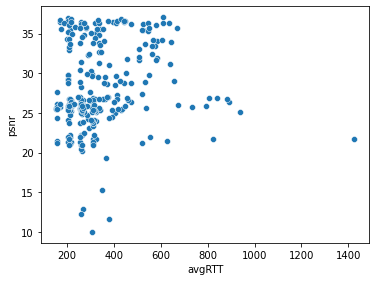

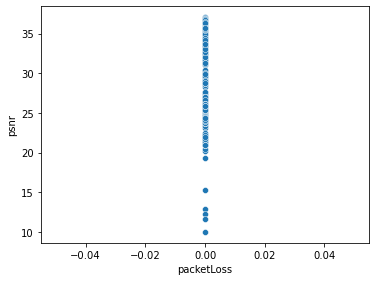

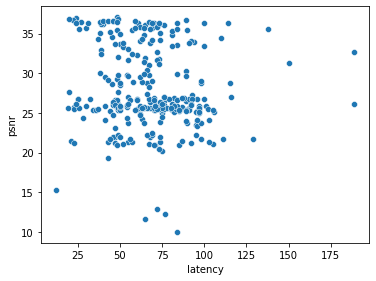

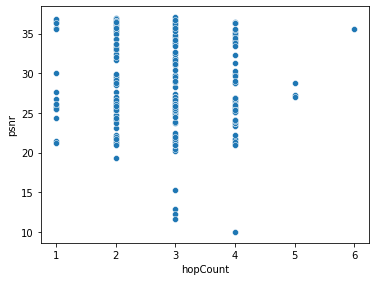

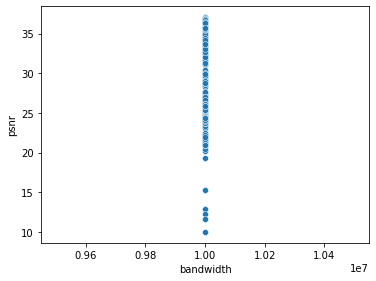

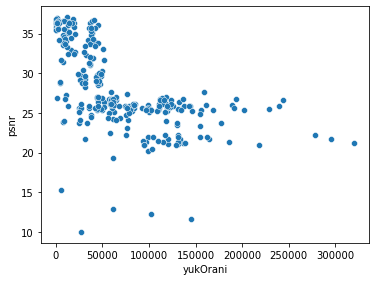

In [6]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [7]:
# sns.displot(df)

In [8]:
df["mos"].value_counts()

mos
4    173
5     73
3     37
2      4
1      2
Name: count, dtype: int64

In [9]:
y=df["mos"]
x=df.drop(["mos","host","ssim_first","ssim_second","type","psnr","server","packetLoss"],axis="columns")
y


0      2
1      4
2      4
3      2
4      4
      ..
292    4
293    4
294    4
295    4
296    3
Name: mos, Length: 289, dtype: int64

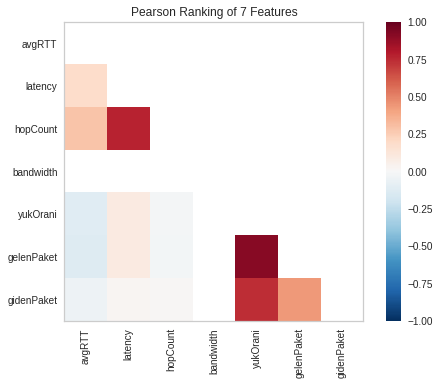

<AxesSubplot:title={'center':'Pearson Ranking of 7 Features'}>

In [10]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [11]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,289.0,3.385141e+02,1.582703e+02,1.536090e+02,2.347400e+02,3.047750e+02,3.801970e+02,1.425112e+03
latency,289.0,6.712457e+01,2.527484e+01,1.200000e+01,4.900000e+01,6.700000e+01,8.300000e+01,1.890000e+02
hopCount,289.0,2.809689e+00,9.364028e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,6.000000e+00
bandwidth,289.0,1.000000e+07,0.000000e+00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
yukOrani,289.0,6.960336e+04,5.732625e+04,3.240444e+02,2.606163e+04,5.635800e+04,1.109323e+05,3.201290e+05
gelenPaket,289.0,2.001517e+07,1.963052e+07,4.650000e+03,4.185090e+06,1.068209e+07,3.318217e+07,5.909153e+07
gidenPaket,289.0,4.382810e+06,1.094884e+07,2.409400e+04,3.009330e+05,1.171479e+06,3.085164e+06,8.691527e+07


In [12]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.10, random_state=42)

In [13]:
yTest.value_counts()

mos
4    18
5     9
1     1
3     1
Name: count, dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression
LinModel=LinearRegression()
LinModel.fit(XTrain,yTrain)
tahmin=LinModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.20911355460353664


In [15]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.3831474180149045 test: 0.33603198706648196
max_depth : 2 --> score r2 : eğitim:0.49666962201744647 test: 0.37580933542783146
max_depth : 3 --> score r2 : eğitim:0.5954794411302631 test: 0.48807930876923467
max_depth : 4 --> score r2 : eğitim:0.6833456732391265 test: 0.4486777499373593
max_depth : 5 --> score r2 : eğitim:0.7644242023461354 test: 0.47602691441460543
max_depth : 6 --> score r2 : eğitim:0.8285724976647371 test: 0.44878293509954625
max_depth : 7 --> score r2 : eğitim:0.8656410785116209 test: 0.44466050103091004
max_depth : 8 --> score r2 : eğitim:0.8896544494505864 test: 0.45045528701753357
max_depth : 9 --> score r2 : eğitim:0.9086179039954239 test: 0.49069203975635023
max_depth : 10 --> score r2 : eğitim:0.9079684043222029 test: 0.42820754181266363
max_depth : 11 --> score r2 : eğitim:0.9045169381111384 test: 0.4696411866007125
max_depth : 12 --> score r2 : eğitim:0.9139681331652179 test: 0.45741888375545403
max_depth : 13 --> score r

In [16]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.283269961977186
n_neigbors : 2 --> score r2 : eğitim:0.782062028499581 test: 0.33840304182509473
n_neigbors : 3 --> score r2 : eğitim:0.692375620474717 test: 0.3629066328686099
n_neigbors : 4 --> score r2 : eğitim:0.6519046288534973 test: 0.3315114068441062
n_neigbors : 5 --> score r2 : eğitim:0.6406445003259755 test: 0.2965019011406841
n_neigbors : 6 --> score r2 : eğitim:0.6183843338542044 test: 0.3108365019011403
n_neigbors : 7 --> score r2 : eğitim:0.5980584652599981 test: 0.3204004035074104
n_neigbors : 8 --> score r2 : eğitim:0.5819071900903419 test: 0.3401259505703419
n_neigbors : 9 --> score r2 : eğitim:0.5667149976754356 test: 0.35269680326714514
n_neigbors : 10 --> score r2 : eğitim:0.5589581198969297 test: 0.3565969581749048
n_neigbors : 11 --> score r2 : eğitim:0.5473801234679082 test: 0.36528611381705023
n_neigbors : 12 --> score r2 : eğitim:0.5438885611885519 test: 0.37592416561047726
n_neigbors : 13 --> score r2 : eğitim:0

In [17]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.3300008465921256 test: 0.26680175702494413
max_depth : 2 --> score r2 : eğitim:0.43680523075380906 test: 0.35815270510477326
max_depth : 3 --> score r2 : eğitim:0.5719460143909899 test: 0.3427263184500422
max_depth : 4 --> score r2 : eğitim:0.6439562749280454 test: 0.3230217867738082
max_depth : 5 --> score r2 : eğitim:0.7394821722777266 test: 0.09107124901645947
max_depth : 6 --> score r2 : eğitim:0.8616193915812058 test: 0.2323593228944888
max_depth : 7 --> score r2 : eğitim:0.920258060635754 test: 0.19922725282914866
max_depth : 8 --> score r2 : eğitim:0.9513209773058893 test: -0.05780262634898525
max_depth : 9 --> score r2 : eğitim:0.9814349135388531 test: 0.059291825095056594
max_depth : 10 --> score r2 : eğitim:0.9946188155185082 test: 0.06273764258555092
max_depth : 11 --> score r2 : eğitim:1.0 test: 0.17300380228136847
max_depth : 12 --> score r2 : eğitim:1.0 test: 0.17300380228136847
max_depth : 13 --> score r2 : eğitim:1.0 test: 0.0076045

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.5664208878695428 test: 0.4151078488679719
max_depth : 2 --> score r2 : eğitim:0.7763080673968779 test: 0.5592178598495584
max_depth : 3 --> score r2 : eğitim:0.8947284932042756 test: 0.48738546059125554
max_depth : 4 --> score r2 : eğitim:0.967012331131277 test: 0.44540296560452464
max_depth : 5 --> score r2 : eğitim:0.9895002279087558 test: 0.2798394283230393
max_depth : 6 --> score r2 : eğitim:0.9992277250516166 test: 0.307866767102589
max_depth : 7 --> score r2 : eğitim:0.9999421499133097 test: 0.24029848635583806
max_depth : 8 --> score r2 : eğitim:0.9999988542443604 test: 0.18537173975437293
max_depth : 9 --> score r2 : eğitim:0.9999999920602766 test: 0.15817553077419866


In [19]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(XTrain,yTrain)
tahminXGB=xgb.predict(XTest)
print(r2_score(yTest,tahminXGB))

0.6426427053835069


In [20]:
from sklearn.linear_model import RANSACRegressor
ransac=RandomForestRegressor(random_state=42)
ransac.fit(XTrain,yTrain)
tahminRansac=ransac.predict(XTest)
print(f"ransac -> {r2_score(yTest,tahminRansac)}")

ransac -> 0.527581178707224


In [21]:
from sklearn.ensemble import ExtraTreesRegressor
for i in range(1,10,1):
    exTree=ExtraTreesRegressor(max_depth=i)
    exTree.fit(XTrain,yTrain)
    tahminExTree=exTree.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,exTree.predict(XTrain))} test: {r2_score(yTest,tahminExTree)}")

max_depth : 1 --> score r2 : eğitim:0.3100351392648555 test: 0.1847915240223431
max_depth : 2 --> score r2 : eğitim:0.40956558473442173 test: 0.28242510640491403
max_depth : 3 --> score r2 : eğitim:0.49882391151448535 test: 0.3477052485128346
max_depth : 4 --> score r2 : eğitim:0.6022781859621065 test: 0.39896333607594336
max_depth : 5 --> score r2 : eğitim:0.7096155196867108 test: 0.42398501356789875
max_depth : 6 --> score r2 : eğitim:0.7955756078773528 test: 0.444782694218973
max_depth : 7 --> score r2 : eğitim:0.8524025252744751 test: 0.4458976611448182
max_depth : 8 --> score r2 : eğitim:0.9185651000198005 test: 0.4007285849255965
max_depth : 9 --> score r2 : eğitim:0.9541836530284099 test: 0.38158314009575167


In [22]:
tahminGbr

array([4.99331264, 3.99986584, 3.99992797, 3.28517352, 3.99843015,
       5.01055823, 4.76923521, 3.99999075, 3.99995595, 3.01434136,
       4.99922799, 4.89541946, 5.00769   , 3.97988537, 4.99686866,
       5.04910391, 3.99679993, 5.00010306, 3.99999987, 3.99967919,
       4.06069552, 3.72096042, 3.99999711, 3.99997479, 4.00000261,
       3.99998843, 5.0101423 , 2.99988633, 3.00636514])

In [23]:
yTest

46     5
159    4
282    4
43     4
184    4
10     5
47     5
174    4
78     4
198    4
225    5
34     5
118    5
219    4
57     5
227    4
5      1
229    4
242    4
76     4
276    4
85     5
115    4
279    4
74     4
295    4
142    5
149    4
113    3
Name: mos, dtype: int64

In [24]:
yTrain

61     5
102    4
188    3
156    4
241    5
      ..
191    5
72     4
108    4
278    4
103    4
Name: mos, Length: 260, dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

KeyError: "['packetLoss'] not in index"

In [ ]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

-4.642549972693122


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: -71.4195313685805
n_neigbors : 2 --> score r2 : eğitim:0.5408173794694464 test: -30.180746540462962
n_neigbors : 3 --> score r2 : eğitim:0.38098304140622574 test: -12.35957091007418
n_neigbors : 4 --> score r2 : eğitim:0.3281552469486244 test: -9.492854763586301
n_neigbors : 5 --> score r2 : eğitim:0.2724046958868013 test: -7.497837930339246
n_neigbors : 6 --> score r2 : eğitim:0.23108394497407914 test: -4.9427443097501085
n_neigbors : 7 --> score r2 : eğitim:0.19209244775566126 test: -3.456755754337749
n_neigbors : 8 --> score r2 : eğitim:0.17602631125580537 test: -2.5576503781062625
n_neigbors : 9 --> score r2 : eğitim:0.1710088829317742 test: -1.8517249772630833
n_neigbors : 10 --> score r2 : eğitim:0.161902013384302 test: -1.29895426405142
n_neigbors : 11 --> score r2 : eğitim:0.15543368650474965 test: -0.9510317016514858
n_neigbors : 12 --> score r2 : eğitim:0.1437638012141057 test: -0.7309591890051519
n_neigbors : 13 --> score r2 : e

In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,bootstrap=True,criterion="friedman_mse",max_features='log2',max_leaf_nodes=None,n_estimators=100,n_jobs=1,random_state=42)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.11064440698553679 test: -0.9106493394064936
max_depth : 2 --> score r2 : eğitim:0.3096475043477387 test: -2.5628808061754627
max_depth : 3 --> score r2 : eğitim:0.519910586117451 test: -4.368034996632447
max_depth : 4 --> score r2 : eğitim:0.6688130935161649 test: -9.106353582307468
max_depth : 5 --> score r2 : eğitim:0.7728111715877166 test: -8.516749120595469
max_depth : 6 --> score r2 : eğitim:0.8164965810486424 test: -7.56924805780395
max_depth : 7 --> score r2 : eğitim:0.8287055299351374 test: -7.168315973295311
max_depth : 8 --> score r2 : eğitim:0.8379512271295804 test: -13.43677374330953
max_depth : 9 --> score r2 : eğitim:0.8404991309431038 test: -10.848339395190308
max_depth : 10 --> score r2 : eğitim:0.8342687130109395 test: -9.247283975873103
max_depth : 11 --> score r2 : eğitim:0.8334497439097873 test: -8.47899860081651
max_depth : 12 --> score r2 : eğitim:0.8336238361783528 test: -9.034320291977089
max_depth : 13 --> score r2 : eğitim

In [ ]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.10061124789406062 test: -0.498523431015212
max_depth : 2 --> score r2 : eğitim:0.19853967411969042 test: -3.4609577066576245
max_depth : 3 --> score r2 : eğitim:0.47647685872718815 test: -34.026308787957454
max_depth : 4 --> score r2 : eğitim:0.7240636388469759 test: -74.40562190798799
max_depth : 5 --> score r2 : eğitim:0.9795529020264285 test: -71.84859497418822
max_depth : 6 --> score r2 : eğitim:0.9833826811387384 test: -72.23760624774027
max_depth : 7 --> score r2 : eğitim:0.987429990338354 test: -71.81432255107657
max_depth : 8 --> score r2 : eğitim:0.9962372899385743 test: -0.8874550010499995
max_depth : 9 --> score r2 : eğitim:0.9985824148972497 test: -72.3241338088478
max_depth : 10 --> score r2 : eğitim:0.9994861256924849 test: -72.25017967653562
max_depth : 11 --> score r2 : eğitim:0.9999807542844047 test: -72.25910849711639
max_depth : 12 --> score r2 : eğitim:0.9999971943186402 test: -72.73617135538156
max_depth : 13 --> score r2 : eği

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.33883339404507307 test: -2.377428860412824
max_depth : 2 --> score r2 : eğitim:0.9562457199999259 test: -17.661178948117293
max_depth : 3 --> score r2 : eğitim:0.987890892239113 test: -23.594518654870196
max_depth : 4 --> score r2 : eğitim:0.9989850375313967 test: -29.953745493628936
max_depth : 5 --> score r2 : eğitim:0.9998685829132781 test: -42.365264581535754
max_depth : 6 --> score r2 : eğitim:0.9999693439964115 test: -49.80191283096458
max_depth : 7 --> score r2 : eğitim:0.9999989030738063 test: -33.286911678722895
max_depth : 8 --> score r2 : eğitim:0.9999998522010303 test: -56.287910237405455
max_depth : 9 --> score r2 : eğitim:0.9999999948824845 test: -58.865711456639865
